In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
file_path = '/content/Titanic-Dataset.csv'
titanic_df = pd.read_csv(file_path)

In [ ]:
print("First few rows of the dataset:")
print(titanic_df.head())

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [ ]:
print("\nMissing values:")
print(titanic_df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [ ]:
titanic_df.drop(columns=['Cabin'], inplace=True)
titanic_df.dropna(subset=['Fare'], inplace=True)

In [ ]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df.drop(columns=['Name', 'Ticket'], inplace=True)

In [ ]:
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'\nAccuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 0.8268156424581006

Confusion Matrix:
[[93 12]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



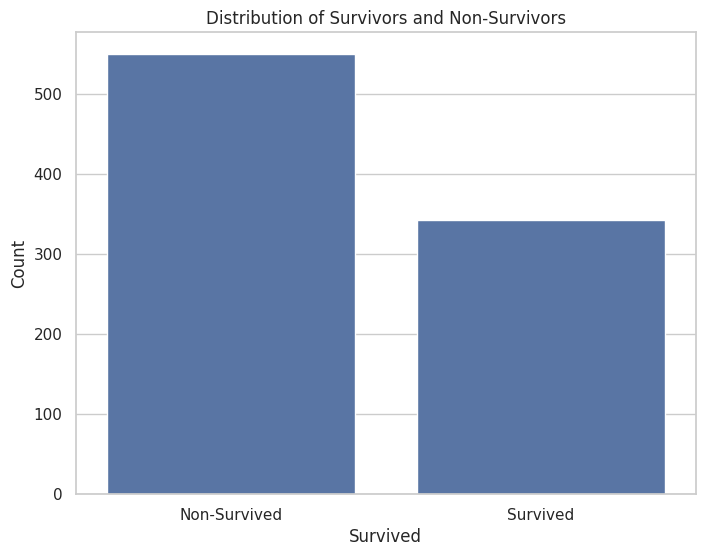

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Distribution of Survivors and Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Survived', 'Survived'])
plt.show()

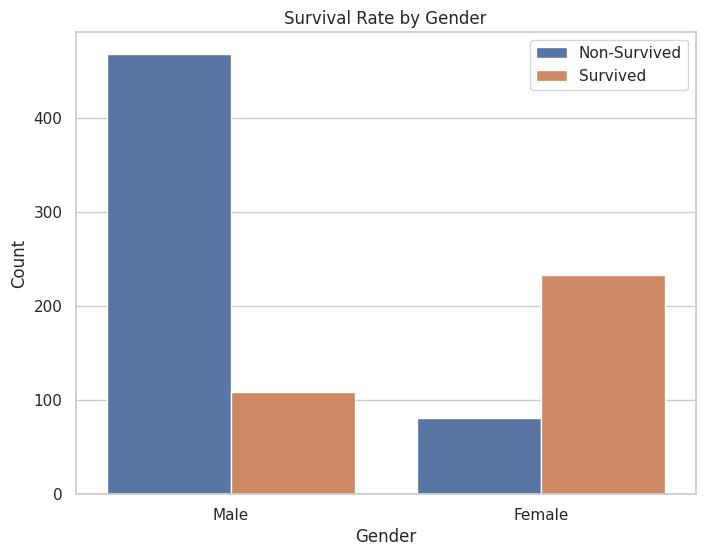

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend(['Non-Survived', 'Survived'])
plt.show()

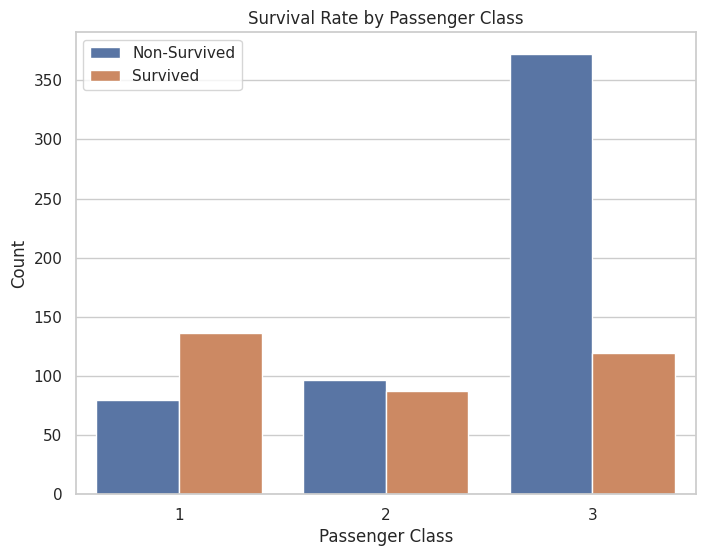

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Non-Survived', 'Survived'])
plt.show()

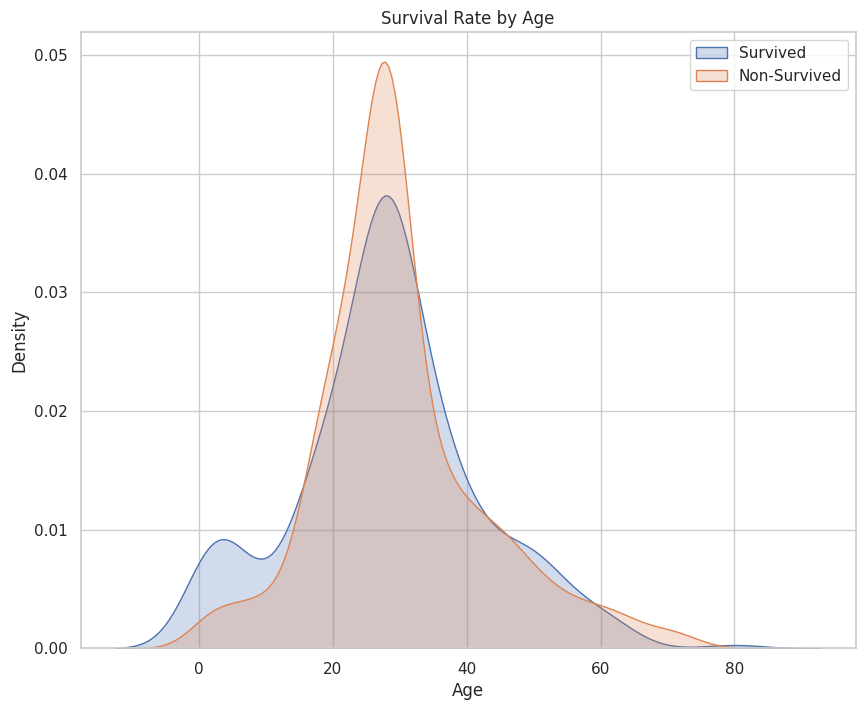

In [ ]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=titanic_df[titanic_df['Survived'] == 1], x='Age', label='Survived', fill=True)
sns.kdeplot(data=titanic_df[titanic_df['Survived'] == 0], x='Age', label='Non-Survived', fill=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

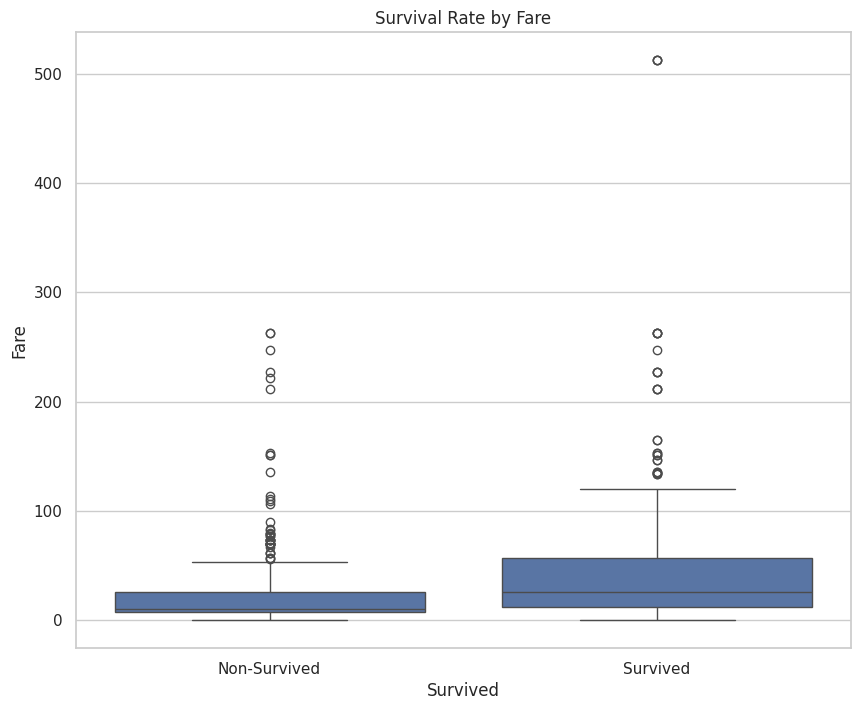

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.title('Survival Rate by Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Non-Survived', 'Survived'])
plt.show()